## Suport vector machine draws a hyper plane in n dimensional space such that it maximizes margin between classification groups

## In Support Vector Machine (SVM) algorithms, the term "gamma" is a hyperparameter that defines the influence of a single training example's distance on the decision boundary. The gamma parameter essentially controls the shape of the decision boundary.

High Gamma:

A high gamma value results in a more complex decision boundary.
It means that a single training example has a high influence on the decision boundary.
With a high gamma, the SVM tends to focus more on the training data itself, potentially leading to overfitting. The decision boundary might become too specific to the training data and might not generalize well to new, unseen data.
Low Gamma:

A low gamma value results in a smoother and more generalized decision boundary.
It means that the influence of a single training example on the decision boundary is more spread out.
With a low gamma, the SVM pays less attention to individual training examples and focuses on a broader view of the data. This can help the model generalize better to new, unseen data.
In summary, the choice of gamma in SVM is crucial, and it involves finding a balance between creating a decision boundary that accurately fits the training data (without overfitting) and generalizes well to new data. The optimal gamma value often depends on the specific characteristics of the dataset and the problem at hand, and it is a hyperparameter that needs to be tuned during the model training process.

## In the context of Support Vector Machines (SVMs), regularization is controlled by the hyperparameter commonly known as "C." The regularization parameter (C) determines the trade-off between achieving a smooth decision boundary and classifying the training points correctly. Here's an explanation of high and low regularization:

High Regularization (High C):

A high value of the regularization parameter (C) imposes a stronger penalty on misclassifications.
The SVM will strive to classify all training examples correctly and might lead to a more complex decision boundary.
High regularization may lead to overfitting if the training data contains noise or outliers.
Low Regularization (Low C):

A low value of the regularization parameter (C) allows the SVM to be more flexible and may result in a simpler decision boundary.
The SVM may tolerate some misclassifications in favor of achieving a broader margin.
Low regularization helps prevent overfitting by creating a smoother decision boundary.

In [6]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.data[5]

array([5.4, 3.9, 1.7, 0.4])

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [25]:
df['flower_name'] =df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [26]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

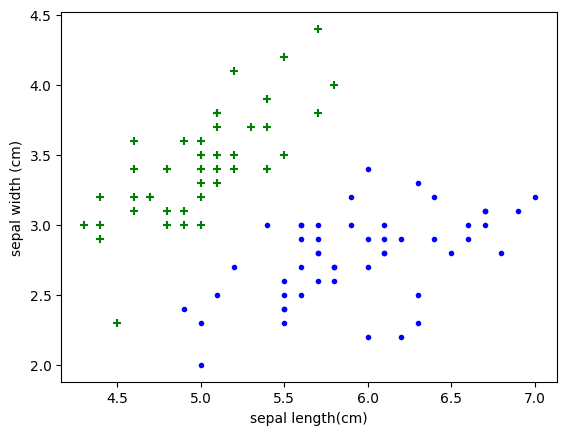

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width (cm)')
plt.show()

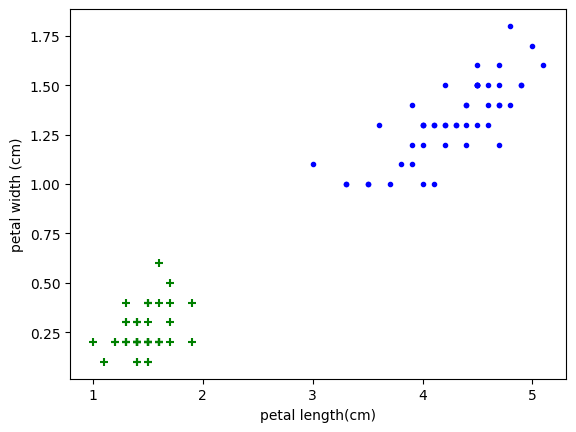

In [31]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')
plt.xlabel('petal length(cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [34]:
X = df.drop(['target','flower_name'],axis='columns')

In [56]:
y = df.target

In [75]:
from sklearn.svm import SVC
model = SVC(C=500.0,gamma='auto',kernel='linear')

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [77]:
len(X_test)

30

In [78]:
model.fit(X_train,y_train)

SVC(C=500.0, gamma='auto', kernel='linear')

In [79]:
model.score(X_test,y_test)

1.0

In [80]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])